<font size="4"><b>Оглавление </b></p></font> 
<a id='contents'></a>

1. [Постановка задания](#intro)
2. [Обзор данных](#data_review)
- [Выводы](#data_reviw_summary)
3. [Предобработка данных](#data_moderation)
- [Стиль заголовков](#data_columns)
- [Пропуски в данных и типы данных](#data_types_and_passes)
- [Дополнительные расчеты](#additional_calculation)
- [Проверка явных дубликатов](#data_duplicates)
- [Выводы](#data_moderation_summary)
4. [Исследование данных](#data_research)
- [Оценка динамики продаж](#sales)
- [Популярные платформы](#top_platforms)
- [Пользовательский рейтинг и метакритика](#users_meta_score)
- [Игровые жанры](#genres)
- [Региональные портреты пользователей](#users_types)
- [Выводы](#data_research_summary)
5. [Проверка гипотез](#hypothesis_check)
- [Гипотеза 1](#hypothesis_1)
- [Гипотеза 2](#hypothesis_2)
6. [Итоги исследования](#summary)

<a id='intro'></a>

# **Сборный проект. Исследование рынка компьютерных игр**

**Заказчик** — интернет-магазин компьютерных игр «Стримчик».

**Цель исследования**:
1. Выявить определяющие успешность игры закономерности и критерии.

**Поставленные задачи**
1. Проверить данные на наличие пропусков, аномалий и дубликатов. Выяснить их природу и по возможности исправить.
2. Оценить динамику продаж игр на разных платформах в разные годы.
3. Описать основные платфомы для компьютерных игр.
4. Произвести сравнительный анализ предпочтений пользователей по жанрам.
5. Определить основные параметры компьютерных игр для успешности продаж регионально.
6. Проверить истинность гипотез:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Дальнейшее использование**

Результаты исследования будут использоваться для планирования маркетинговой стратегии продвижения компьютерных игр для улучшения продаж и увеличения вовлеченности пользователей в сервис магазина «Стримчик» на предстоящий 2017 год.

**Дополнительно предоставленная инфомарция**

1. Точка отсчета принята 2016 год.
2. Данные собраны за текущий год.
3. Данные за 2016 год могут быть неполными.
4. Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию: «Для взрослых», «Для детей младшего возраста» или «Для подростков».

[К оглавлению](#contents)

<a id='data_review'></a>

## **I. Обзор данных**

В ходе исследования нам понадобятся библиотеки:

* `pandas`
* `seaborn`
* `math`
* `matplotlib`
* `numpy`
* `scipy`
* `copy`
* `os`

Поэтому сразу импортируем их.

In [1]:
import pandas as pd

#pd.options.display.float_format ='{:,.1f}'.format

import seaborn as sb

import math

import matplotlib.pyplot as plt

import numpy as np

from scipy import stats as st

import copy

import os

Сначала составим представление о полученных исходных данных.

Прочитаем исходный файл с данными `games.csv` из папки `/datasets/` и сохраним в переменную `df`:

In [2]:
import os

pth1 = 'datasets/games.csv'
pth2 = '/datasets/games.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1, sep=',')
elif os.path.exists(pth2):
    df = pd.read_csv(pth2, sep=',')
else:
    print('Something is wrong')

Выведем на экран первые пять строк таблицы и получим общую информацию о таблице: <a id='df.info'></a>:

In [3]:
print('\n\t\033[4m\033[1m\033[31m{}\033[0m'.format('Games'))
display(df.head())
print('_' * 130)

print('\t\t\033[4m\033[1m\033[31m{}\033[0m'.format('Games.csv'), '\n')
display(df.info())
print('*' * 50)


	Games


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


__________________________________________________________________________________________________________________________________
		Games.csv 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

**************************************************


Итак, мы имеем следующие данные и информацию о них согласно исходной документации: 
    
**1. Таблица `games` (информация о компьютерных играх):** 

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

Типы данных в столбцах — вещественные числа `float` и строки `object`.

В информации по датасету и первичной выгрузке в глаза бросается сразу:
- в названиях колонок видны следующие нарушения стиля: **строчные буквы сочетаются с прописными**;
- неверное определение типов данных для столбцов: `User_Score` и `Rating` представлены не в числовом формате;
- количество значений в столбцах различается; значит, в данных есть **пропущенные значения**.

В последующем для анализа нам потребуется получить итоговые значения продаж игр со всех регионов и вынести в отдельную сводную таблицу.

<a id='data_reviw_summary'></a>

### **Выводы**

В каждой строке таблицы — данные об уникальной компьютерной игре. Часть колонок описывает общие параметры игры: дата релиза, жанр, актуальная платформа, статистические оценочные данные с ресурсов (целевой сервис или же централизованная база оценок пользователей, критиков и возрастной рейтинговой организации), остальные данные рассказывают о бизнес аспектах: уровень продаж в различных обозначенных регионах мира.

Предварительно можно утверждать, что данных достаточно для исследования и решения поставленных задач. Однако первично потребуется преобразовать исходные данные для последующего анализа:
1. привести данные к нормам стиля;
2. проработать пропуски;
3. скорректировать типы данных и выявить причину их появления;
4. изучить источник на наличие дубликатов и аномалий;
5. произвести расчет с итоговым значением продаж по всем регионам для каждой компьютерной игры и добавить в дополнительную колонку.

Прежде, чем перейти к решению поставленных задач, необходимо устранить вышеописанные проблемы в данных.

[К оглавлению](#contents)

<a id='data_moderation'></a>

## **II. Предобработка данных**

<a id='data_columns'></a>

### 1. Стиль заголовков

Вывевем на экран названия столбцов:

In [4]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведем названия в соответствие с хорошим стилем:
* все символы сделаем строчными.

Для этого напишем **функцию `columns_to_norm` для переименования колонок**, которую можно будет использовать при больших объемах данных:

In [5]:
def columns_to_norm(columns):
    columns_new = []
    for column in columns:
        name = []
        for index in range(len(column)):
            if column[index] != ' ' and column[index] != '_':
                name.append(column[index])     
            elif index + 1 <= len(column)-1 and index - 1 >= 0 and len(name) != 0:  # условие отсекающее ошибку выхода за границы индексирования и добавления "_" первым знаком   
                if (column[index + 1] != ' ' and column[index + 1] != '_'):           # проверка следующего индекса на наличие значения         
                    name.append('_')
        name = ''.join(name)
        name = name.lower()
        columns_new.append(name)
    df.columns = columns_new
    return df.columns

Примерим созданную функцию для корректировки названия столбцов и проверим результат. 

In [6]:
columns_to_norm(df.columns)

print(df.columns) # для проверки правильности выполнения кода на изменение имен

df.head(0)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


[К оглавлению](#contents)

<a id='data_types_and_passes'></a>

### 2. Пропуски в данных и типы данных

Как видно из [общей информации](#df.info) о датафрейме `df`, количество значений в столбцах неоднородное.

In [7]:
for column in list(df.columns):
    print('Количество пропусков в столбце \033[4m\033[1m\033[31m{}\033[0m:'.format(column), len(df[df[column].isna()]))
    k = len(df[df[column].isna()]) / df.shape[0]
    print(f'Таким образом доля незаполненных данных составляет: {k:.1%}\n')

Количество пропусков в столбце name: 2
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце platform: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце year_of_release: 269
Таким образом доля незаполненных данных составляет: 1.6%

Количество пропусков в столбце genre: 2
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце na_sales: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце eu_sales: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце jp_sales: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце other_sales: 0
Таким образом доля незаполненных данных составляет: 0.0%

Количество пропусков в столбце critic_score: 8578
Таким образом доля незаполненных данных составляет: 51.3%

Количество пропусков в столбце user_score: 6701
Таким образом доля незаполненн

- `name` имеется два пропущенных названия продукта, которое мы заменим на заглушку `unknown`;

In [8]:
df['name'] = df['name'].fillna(value='unknown')

Конретные названия игр нам в исследовании не нужны, а их прочие данные - уже да, поэтому лишний раз лучше не трогать данные, если они не вносят изменения

- пропусков в `year_of_release` и `genre` менее 2% от общего числа, поэтому мы их удаляем

In [9]:
df.dropna(subset = ['year_of_release', 'genre'], inplace=True)

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')

- среди оценок критиков `critic_score` и `user_score` слишком много пропусков, чтобы удалять и заполнить их подходящими значениями не представляется возможным. Поэтому предлагается заменить их на числовую заглушку `-1`

- среди пользовательских оценок `user_score` и `critic_score` имеются нечисловые значения `tbd`, которые не поддаются объяснению или какой-либо закономерности. Их также слишком много, чтобы удалять и заполнить  подходящими значениями не представляется возможным. Поэтому предлагается заменить их на числовую заглушку `-1` и затем перевести в `.float`

In [12]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
df.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [14]:
for column in ['user_score', 'critic_score']:
    df[column] = (df[column]
                        .replace('tbd', np.nan)
                        .astype('float64')     
                       )

- столбец с рейтигами `rating` с буквенного формата преобразуем в более привычный численный. Пропуски заменим на числовую заглушку `-1` и переведем в формат int

In [15]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Соотношение рейтингов ESRB:**
- «EC» («Early childhood») — «Для детей младшего возраста» - `3+`
- «E» («Everyone») — «Для всех» - `6+`
- «E10+» («Everyone 10 and older») — «Для всех старше 10 лет» - `10+`
- «K-A» («Kids to Adults») —  «Для детей и взрослых» - `10+` (устаревший)
- «T» («Teen») — «Подросткам» - `13+`
- «M» («Mature») — «От 17 лет» - `17+`
- «AO» («Adults Only 18+») — «Только для взрослых» - `18+`
- «RP» («Rating Pending»") — «Рейтинг ожидается» - заменим на заглушку `-1`

In [16]:
def rating_to_values (ESRB_rating):
    if ESRB_rating == 'EC':
        return 3
    if ESRB_rating == 'E':
        return 6
    if ESRB_rating == 'E10+':
        return 10
    if ESRB_rating == 'K-A':
        return 10
    if ESRB_rating == 'T':
        return 13
    if ESRB_rating == 'M':
        return 17
    if ESRB_rating == 'AO':
        return 18
    return -1

In [17]:
df['rating'] = df['rating'].apply(rating_to_values)

# Проверяем замену
df['rating'].value_counts()

-1     6677
 6     3921
 13    2905
 17    1536
 10    1396
 3        8
 18       1
Name: rating, dtype: int64

In [18]:
data_rating = (df
    .groupby('rating')
    .agg({'na_sales':['sum']})
    .sort_values(by=('na_sales', 'sum'), ascending=False)
              )
data_rating

,na_sales
,sum
rating,
6,1274.24
-1,1225.84
13,747.60
17,742.89
10,348.06
3,1.53
18,1.26


[К оглавлению](#contents)

<a id='additional_calculation'></a>

### 3. Дополнительные расчеты

Выполним расчет с итоговым значением продаж по всем регионам для каждой компьютерной игры и добавим в дополнительную колонку

In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

<a id='data_duplicates'></a>

### 4. Проверка явных дубликатов

In [20]:
print(f'Дубликатов в \033[4m\033[1m\033[31mGames\033[0m: {df.duplicated().sum()}')
print('-' * 25)

Дубликатов в Games: 0
-------------------------


[К оглавлению](#contents)

### **Выводы**

Выведем на экран еще раз общую информацию и первые строки датафрейма, чтобы посмотреть на результат предобработки данных

In [21]:
print('\n\t\033[4m\033[1m\033[31m{}\033[0m'.format('Games'))
display(df.head())
print('_' * 130)

print('\t\t\033[4m\033[1m\033[31m{}\033[0m'.format('Games.csv'), '\n')
display(df.info())
print('*' * 50)


	Games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,6,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,6,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,6,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38


__________________________________________________________________________________________________________________________________
		Games.csv 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  int64  
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(2), object(3)
memory usage: 2.1+ MB


None

**************************************************


<a id='data_moderation_summary'></a>

По итогу предобработки пропусков в данных было выполнено и сделаны следующие выводы:
1. заголовки исходной таблицы были приведены к нормам стиля;
2. были проработаны пропуски: не оказывающие значимого влияния на дальнейший анализ данные и малое количество пропустов были удалены, пропущенные значения были заменены на данные-заглушки `unknown`, для рейтинга пользователей и критиков пропуски оставили для проведения дальнейших математических операций, так как огромное их кочество не позволяет полностью от них отказаться, а анализ данных с недостаточной информацией также значим. Помимо этого заменить на какие-либо групповые значения не представлялось возможным, так как данные пропуски связаны с их отсутствием при выгрузке, а значит любые манипуляции приведут к внесению искажений на дальнейшее исследование; 
3. были скорректированы типы данных в годах и рейтинге возрастной ассоциации, также для столбцов `rating` неизвестное значение `tdb` было заменено на пропуск `NaN`, чтобы не влиять на математические операции с данными;
4. дубликатов в исходных данных не обнаружено;
5. в датафрейм добавлены данные по общему количеству продаж каждой компьютерной игры по регионам.

Согласно ранее поставленным задачам выполним сперва преобразование типов данных для столбцов: `year_of_release` (представлено не целыми числами), `user_score` и `rating` представлены не в числовом формате.

[К оглавлению](#contents)

<a id='data_research'></a>

## III. Исследование данных

<a id='sales'></a>

### 1. Оценка динамики продаж игр на разных платформах в разные годы

Для этого выгрузим данные по продажам разных лет

<AxesSubplot:title={'center':'Распределение продаж игр по годам'}, xlabel='year_of_release'>

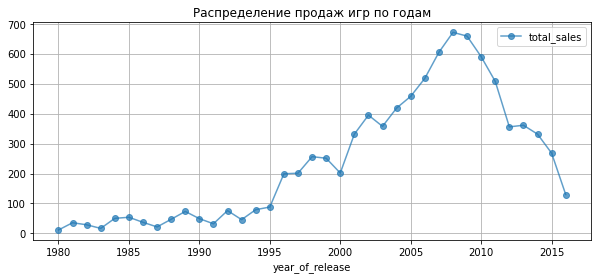

In [22]:
(df
    .groupby('year_of_release')
    .agg({'total_sales':'sum'})
    .plot(legend=True, style='o-', grid=True, figsize=(10, 4),title='Распределение продаж игр по годам', label='total_sales', alpha=0.7)
)

По построенному графику можно сделать несколько выводов:
- Начиная с 1995 года наблюдается рост продаж компьютерных игр со 100 млн. копий до почти 680 млн. в 2008 году в связи с развитием компьютерных технологий, сервисов, а самое главное - увеличилась покупательская способность населения и спрос на игры в связи с наличием ПК. До этого времени обладание данной техникой было дорогостоящим и весьма громоздким.
- Начиная с 2008 года наблюдается деградация уровня продаж до 150 млн. копий в 2016 году. Возможно, это связано с внешнеполитическими и экономическими факторами страны, а также широким распространением сети Интернет и пиратского контента на сторонних сервисах (не призываю и осуждаю 😁).

Исходя из дополнительной информациив описании, **на дворе 2016 год**, следовательно наиболее актуальными данными будем считать данные, начиная с 2013 года, когда рынок совершил небольшой "отскок" после резкого падения. В перспективе необходимо уменьшать промежуток актульаной статистики в связи с быстро развивающимися технологиями и потребностями пользователей.

<a id='for_comment3'></a>

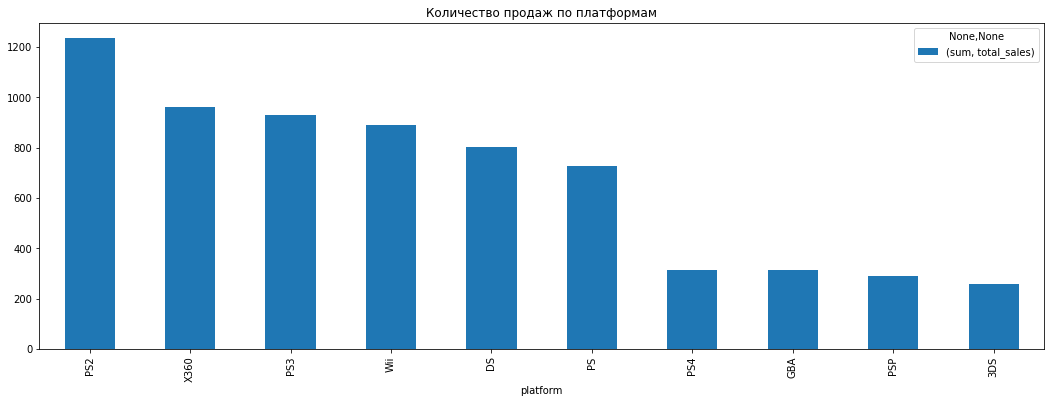

In [72]:
 # создадим сводную таблицу по суммарным продажам игр среди всех платформ до 2016 года
(df
 .pivot_table(
     index='platform',
     values='total_sales',
     aggfunc=['sum'])
 # отсортируем в порядке убывания
 .sort_values(
     by=('sum', 'total_sales'),
     ascending=False)
 # выведем топ 10 платформ по продажам
 .head(10)
 # построим гистограмму по сведенной таблице с топом продаж
 .plot(
     kind='bar', 
     title='Количество продаж по платформам',
     legend=True, 
     figsize=(18, 6)
 )
)
plt.show()


Text(0, 0.5, 'Миллионы копий')

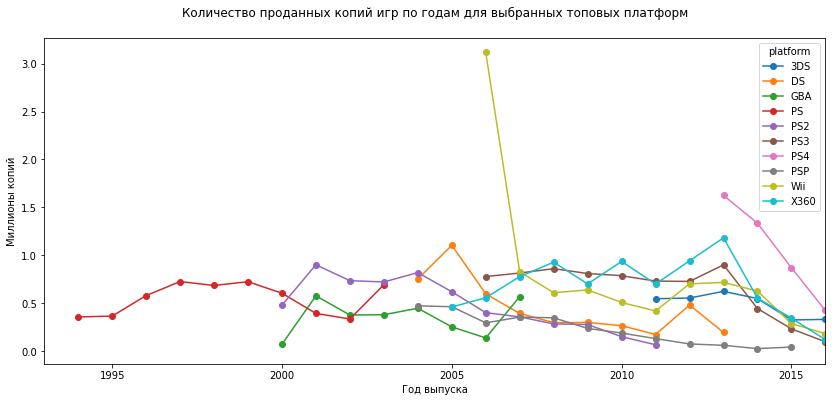

In [86]:
 # список топовых платформ по продажам
top_platforms = ['PS2', 'PS3', 'X360', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']
 
 # создадим сводную таблицу по суммарным продажам игр среди топовых платформ до 2016 года
(df
 .query('platform in @top_platforms')
 .pivot_table(
     index='platform',
     columns='year_of_release',
     values='total_sales')
 # построим график распределения продаж по годам среди отобранных платформ
 .T
 .plot(kind='line', figsize=(14,6),  style = 'o-')
)
 # ограничимся 1993 годом, иначе там есть вообще динозавр, который скорее всего является выбросом
plt.xlim(1993, 2016)
plt.title('Количество проданных копий игр по годам для выбранных топовых платформ'+ "\n")
plt.xlabel('Год выпуска')
plt.ylabel('Миллионы копий')

Среди топовых платформ по общим продажам есть `PS2`, `PSP`, `DS`, `PS` - то есть это все те платформы, которые по графику жизни уже "умерли" или находятся в состоянии близком к этому, например, `X360`, `PS3`, `Wii`

Уберем одинаковые игры, выходящие на разных платформах, так как они будут искажать анализ. Игры выходят на разных платформах при различных условиях: какая-то может охватывать почти весь спектр, а другая - эксклюзивно на одной. Условимся, что игра выпускается на несколько платформ в этот же год, исключая случаи портирования игр после релиза.

In [24]:
# в отдельной переменной посмотрим на количество игр
df_games_total = df.copy()
df_games_total['name'] = df_games_total['name'].drop_duplicates().reset_index(drop=True)

Построим график распределения количества выпускаемых игр по годам

<AxesSubplot:title={'center':'Распределение количества выпускаемых игр по годам'}, xlabel='year_of_release'>

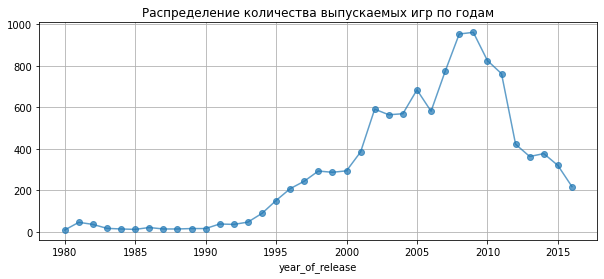

In [25]:
(df_games_total
    .groupby('year_of_release')
    .agg({'name':'count'})
    .plot(legend=False, style='o-', grid=True, figsize=(10, 4),title='Распределение количества выпускаемых игр по годам', label='Game_releases', alpha=0.7)
)

По построенному графику можно сделать следующие выводы:
- Начиная с 1994 года наблюдается рост выпускаемых игр со 100 до почти 950 шт. в год к 2008 году в связи с развитием платформ и массовой культуры виртуальных игр.
- Начиная с 2008 года наблюдается деградация уровня ежегодных релизов до 200 к 2016 году. Это может быть связано с изменением ориентиров игровых издательств: развитие и усложнение цифровых технологий и растущий уровень ожиданий пользователей вынуждает разработчиков виртуальных игр затрачивать больше ресурсов (в том числе временных) на выпуск более качественных продуктов с целью получения хороших продаж. 


[К оглавлению](#contents)

In [26]:
for column in ['user_score', 'critic_score']:
    df[column] = df[column].fillna(value=-1)

Напишем функции построения графиков для анализа

In [27]:
#столбчатая диаграмма

def plot_bar(df):
    (df.plot(
        kind='bar', 
        title='Количество продаж по платформам за 2013-2016 года',
        legend=True, 
        figsize=(18, 6)
    )
     .set(
         xlabel='Платформа', 
         ylabel='Продажи')
    )
    plt.show()

Используем полученные рамки актуальной информации 2013-2016 года для исследования основных платформ для компьютерных игр

На основании ранее сказанного:
* Исходя из дополнительной информациив описании, **на дворе 2016 год**, следовательно наиболее актуальными данными будем считать данные, начиная с 2013 года, когда рынок совершил небольшой "отскок" после резкого падения. В перспективе необходимо уменьшать промежуток актульаной статистики в связи с быстро развивающимися технологиями и потребностями пользователей.
    
Получается можно считать что наше предположение, укрепилось при определении времени жизни, согласно которому платформа живет около 8-10 лет, а активно поддерживается 4-5 лет, если возьмем половину от этого, то получим пиковое значение, которое и будет нашим актуальным периодом. Помимо этого в 2013 году появились две новые платформы `PS4` и `XOne`, начавшие активно развиваться и отвоевывать рынок платформ у предыдущих поколений, что также подтвердило для 2016 года актуальный период в 3 года.

In [98]:
# создадим рамки исследования 2013-2016 годов самых популярных платформ
platform_game_sales_in_year_scope = (df
                       .query('2013 <= year_of_release <= 2016')
                       .pivot_table(
                           index='platform',
                           values='total_sales',
                           aggfunc=['sum', 'count'])
                                     .sort_values(
                                         by=('sum', 'total_sales'),
                                         ascending=False)
                      )

In [99]:
platform_game_sales_in_year_scope.columns = ['количество проданных копий игр, млнл./год', 'количество игровых тайтлов, шт./год']
platform_game_sales_in_year_scope.reset_index()

,platform,"количество проданных копий игр, млнл./год","количество игровых тайтлов, шт./год"
0,PS4,314.14,392
1,PS3,181.43,345
2,XOne,159.32,247
3,3DS,143.25,303
4,X360,136.80,186
5,WiiU,64.63,115
6,PC,39.43,189
7,PSV,32.99,358
8,Wii,13.66,23
9,PSP,3.50,67


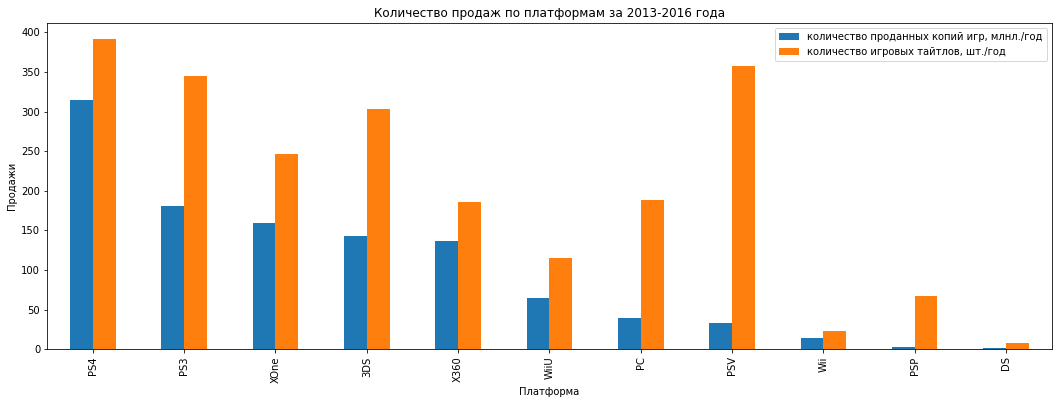

In [100]:
plot_bar(platform_game_sales_in_year_scope)

<a id='or_comment2'></a>

Поместим две величины на один график, чтобы показать одновременно продажи игр (спрос среди пользователей) и количество выпускаемых игр в целом. Так наглядно видно интересные закономерности, например, для PSV и PSP консолей игр выпускалось аномально много, однако продажи никакущие, как и для PC. Следовательно видя такую тенденцию можно предположить: либо происходит угасание платформы с уменьшением поддержки, либо активно развивается пиратство и хакинг (перепрошивка пиратских оболочек для консолей, торренты игр в свободном доступе и тд). Далее уже исходя из этих предположений можно было бы развить анализ в данном направлении

In [31]:
# применим фильтр на все среды компьютерных игр
platform_all = (df
                .query('platform in @platform_game_sales_in_year_scope.index and 2013 <= year_of_release <= 2016')
                .groupby(['platform','year_of_release'])
                .agg({'total_sales':['sum', 'count']})
               )
platform_all.columns = ['total_game_sales_millions', 'total_game_titles']
platform_all.reset_index()
pass

In [32]:
(df
    .query('2013 <= year_of_release <= 2016 and platform in @platform_game_sales_in_year_scope.index')
    .pivot_table(
        index='platform',
        columns='year_of_release',
        values='total_sales',
        aggfunc=['sum', 'count']
    )
    .reset_index()
)

platform     sum                         count                \
year_of_release             2013    2014    2015   2016   2013   2014   2015   
0                    3DS   56.57   43.76   27.78  15.14   91.0   80.0   86.0   
1                     DS    1.54     NaN     NaN    NaN    8.0    NaN    NaN   
2                     PC   12.38   13.28    8.52   5.25   38.0   47.0   50.0   
3                    PS3  113.25   47.76   16.82   3.60  126.0  108.0   73.0   
4                    PS4   25.99  100.00  118.90  69.25   16.0   75.0  137.0   
5                    PSP    3.14    0.24    0.12    NaN   54.0   10.0    3.0   
6                    PSV   10.59   11.90    6.25   4.25   63.0  100.0  110.0   
7                    Wii    8.59    3.75    1.14   0.18   12.0    6.0    4.0   
8                   WiiU   21.65   22.03   16.35   4.60   42.0   31.0   28.0   
9                   X360   88.58   34.74   11.96   1.52   75.0   63.0   35.0   
10                  XOne   18.96   54.07   60.14  26.15   19.0   61.0   80.0   

                        
year_of_release   2016  
0                 46.0  
1                  NaN  
2                 54.0  
3                 38.0  
4                164.0  
5                  NaN  
6                 85.0  
7                  1.0  
8                 14.0  
9                 13.0  
10                87.0

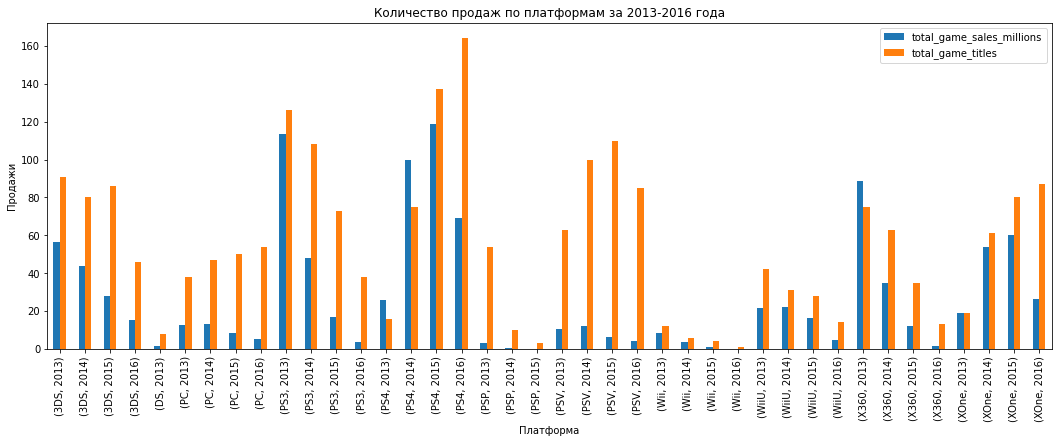

In [33]:
plot_bar(platform_all)

Text(0, 0.5, 'Миллионы копий')

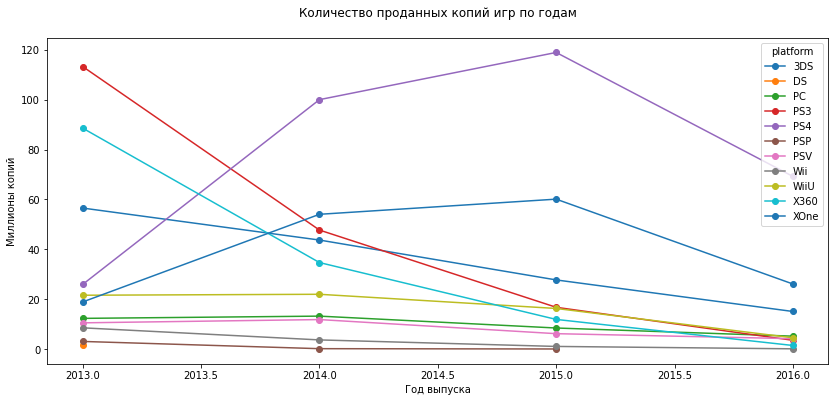

In [93]:
(platform_all
 .pivot_table(index='platform', columns='year_of_release', values='total_game_sales_millions')
 .T
 .plot(kind='line', figsize=(14,6),  style = 'o-')
)
plt.title('Количество проданных копий игр по годам'+ "\n")
plt.xlabel('Год выпуска')
plt.ylabel('Миллионы копий')

Text(0, 0.5, 'Количество игр')

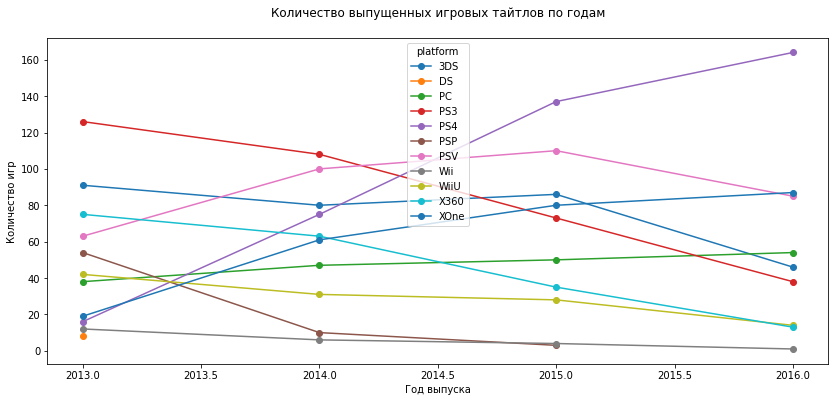

In [35]:
(platform_all
 .pivot_table(index='platform', columns='year_of_release', values='total_game_titles')
 .T
 .plot(kind='line', figsize=(14,6),  style = 'o-')
)
plt.title('Количество выпущенных игровых тайтлов по годам'+ "\n")
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')

Как мы видим, не все платформы продолжают активно продаваться в 2016 году: так, например, **PSP в 2016 году** вообще не имела продаж (возможно, это часть утерянных данных, о которых говорилось в описании), а DS так и вообще после 2013 года. Все это связано с устареванием аппаратного устройства. 

Также стоит отметить несколько интересных тенденций:
1. В последние годы платформы `3DS`, `PS3`, `PSV`, `Wii`, `WiiU` и `X360` плавно и равномерно теряли популярность как среди покупателей (видно по блокам количества проданных копий игр `total_sales_sum`), так и среди разработчиков игр, издателей (видно по блокам количества проданных уникальных игр через сервис `total_sales_count`). Это закономернация тенденция устаревания платформ.
2. Для платформ `XOne` и `PS4` в 2016 году произошел дисбаланс спроса и предложения, что характеризует неудовлетворительную маркетинговую компанию: ассортимент игр рос с каждым годом, а вот спрос на них после 2015 года резко сократился. Возможно, проблема кроется в неправильной рекламной политике, преобладающей конкуренции со стороны другого платформодержателя или каких-либо конфликтов и скандалов вокруг платформодержателей, потому что потребительский спрос очень чувствителен к таким событиям. Однако падение интереса аудитории носит общий характер для обоих передовых платформ этого времени, значит необходимо узнать подробнее обстоятельства того времени и также узнать, возможно, отток клиентов связан с самим сервисом интернет-магазина компьютерных игр «Стримчик».
3. Для платформы `PC` также характерен отток покупателей при равномерном увеличении ассортимента товаров. Если не брать в расчет экономические и политические обстоятельства, то причина может заключаться в открытости самой платформы, позволяющей обходить лицензии официальных приложений.  
4. Предварительно можно сказать, что платформа PS4 имеет лучшие показатели по количеству проданных копий (значит и прибыли) и развитости ассортимента компьютерных игр, представляющего интерес для покупателей (т.е. клюенты не скупают один продукт миллионными копиями, а равномерно размазаны по нескольким/десяткам франшизам).

<div class="alert alert-danger">
<b>Комментарий ревьюера V1❌:</b> 

Объясни, пожалуйста, почему ты решил, что есть дисбаланс спроса и предложения для платформ XOne и PS4?

</div>

Дополнительное пояснение к п.2 на примере PS4:

количество вышедших игр прямо проворционально увеличивалось из года в год с момента появления консоли на рынке с 16 до 164 игр, а вот количество проданных копий игр наоборот в последний год по сравнению с предыдущим очень сильно просело со 119 до 69 млн. Поэтому и получился дисбаланс, новых игр на платформе появилось еще больше, а вовлеченность пользователей даже не осталась на прежнем уровне, она уменьшилась. Это может быть связано с очень большим спектром причин: начиная от игровых издательств (банальное повышение цен на игры, отказ от сотрудничества с дистребьютерами - «Стримчик» - и введения правила продажи консольных игр только во внутреннем магазине) до упущения рассматриваемого сервиса - интернет-магазина компьютерных игр «Стримчик» (возможно раньше для этих платформ проводилось больше акций и распродаж, которые в последний год не организовывались или в недостаточном количестве по каким-либо причинам, соответственно часть аудитории сервис потерял).
    
</div>

**Изучим время жизни платформ**

Время жизни платформы правильнее оценивать с точки зрения продаж игр на них, так как, пока идут продажи, пользователи активно участвуют в жизни платформы. Выпуск игр в таком случае будет ложно информативен.

In [36]:
platform_sales = (df
                  .pivot_table(
                      index='platform',
                      values='total_sales',
                      aggfunc='sum')
                  .sort_values('total_sales',
                               ascending=False))

Функция для вывода данных по продажам (читай времени жизни) запрашиваемой платформы

In [37]:
def years_for_platform(name, df):
    return (df
            .query('platform == @name')
            .pivot_table(
                index='year_of_release',
                values='total_sales',
                aggfunc='sum')
            .sort_values('year_of_release', 
                         ascending=False)
           )

<a id='for_comment'></a>

Построим графики продаж игр по всем платформам заданного периода, используя написанную выше функцию

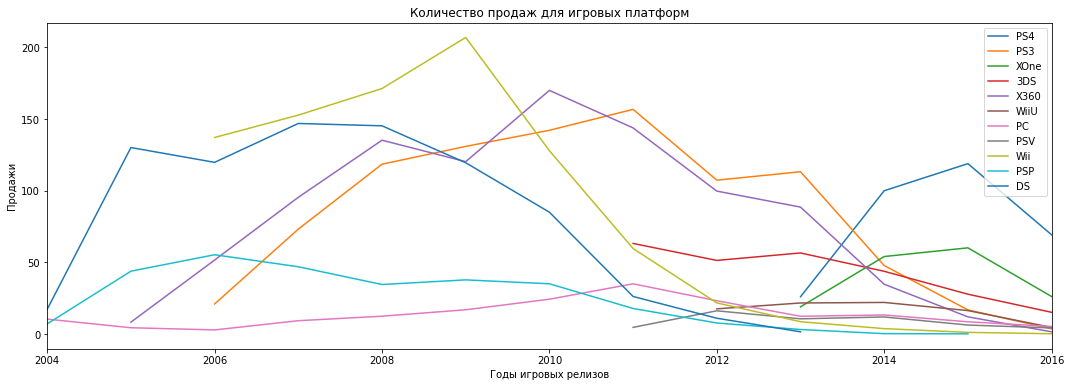

In [106]:
for platform in list(platform_game_sales_in_year_scope.index):
    (
        years_for_platform(platform, df)['total_sales']
        .plot(title='Количество продаж для игровых платформ',
              label=platform,
              xlim=(2004, 2016), #отсекаем аномальные значения и не представляющие для анализа ценности
              figsize=(18, 6))
        .set(xlabel='Годы игровых релизов',
             ylabel='Продажи')
    )
    plt.legend()

В среднем платформа активно развивается и поддерживается ~4-5 лет, а живет около 8-10 лет

<a id='or_comment1'></a>

### 2. Популярные платформы

Обратимся еще раз к построенной ранее диаграмме

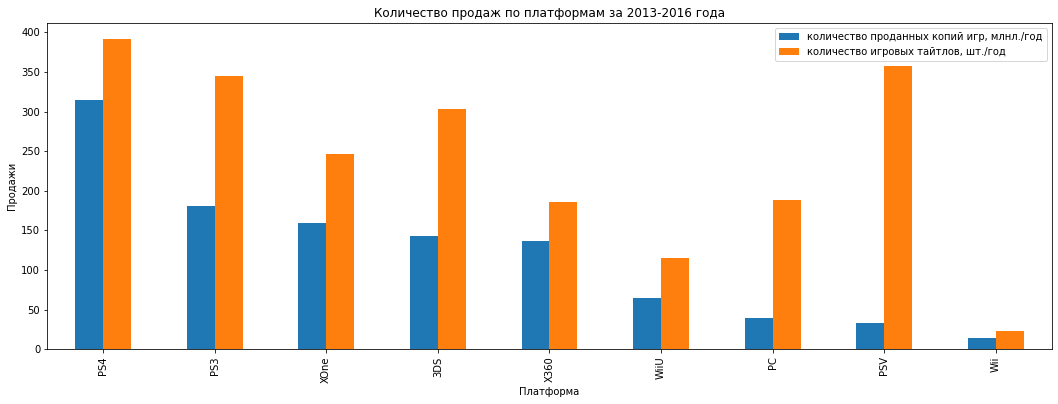

In [107]:
plot_bar(platform_game_sales_in_year_scope.head(9))

In [108]:
# Создадим отдельную переменную с выборкой по годам 2013-2016
recent_platform_data_all = (df
    .query('2013 <= year_of_release <= 2016 and platform in @platform_game_sales_in_year_scope.head(9).index')
    .copy()
)

Построим "ящик с усами" (график распределения) по всем платформам

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

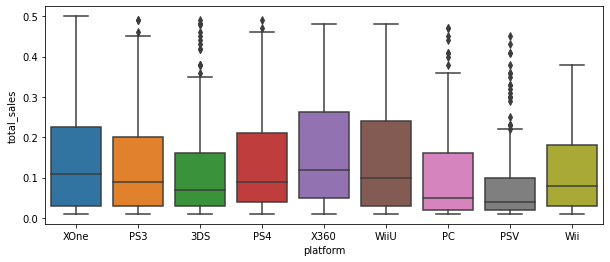

In [109]:
top_quantile = recent_platform_data_all['total_sales'].quantile(0.75)
low_quantile = recent_platform_data_all['total_sales'].quantile(0.25)
threshold = top_quantile + 2*low_quantile
fig, ax = plt.subplots(figsize =(10,4))

sb.boxplot(x = 'platform', 
           y = 'total_sales',
           data = recent_platform_data_all.query('total_sales <= @threshold'),ax=ax)

- У платформ PS4, PS3 и Wii большая часть значений больше медианного. Наиболее равномерно распределены значения у платформы XOne, DS

In [110]:
recent_platform_data_all['total_sales'].describe()

count    2158.000000
mean        0.503082
std         1.253867
min         0.010000
25%         0.040000
50%         0.120000
75%         0.420000
max        21.050000
Name: total_sales, dtype: float64

In [111]:
recent_platform_data_all

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,17,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,17,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1.0,-1.0,-1,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,17,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1.0,-1.0,-1,0.01


In [112]:
for i in ['PS4', 'XOne', '3DS', 'WiiU']:
    print('\033[4m\033[1m\033[31m{}\033[0m:'.format(i))
    display(recent_platform_data_all[recent_platform_data_all['platform'] == i]['total_sales'].describe())
    print('*' * 35)

PS4:


count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

***********************************
XOne:


count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype: float64

***********************************
3DS:


count    303.000000
mean       0.472772
std        1.381347
min        0.010000
25%        0.040000
50%        0.090000
75%        0.280000
max       14.600000
Name: total_sales, dtype: float64

***********************************
WiiU:


count    115.000000
mean       0.562000
std        1.038778
min        0.010000
25%        0.060000
50%        0.200000
75%        0.595000
max        7.090000
Name: total_sales, dtype: float64

***********************************


Смотря на данные видим:

- средние показатели продаж по платформам mean = 0,5, median = 0,15, std = 1,2
- платформа PS4 mean = 0,8 , median = 0,2 , std = 1,6
- платформа XOne mean = 0,64 , median = 0,22 , std = 1,03
- платформа 3DS mean = 0,5 , median = 0,09 , std = 1,4
- платформа WiiU mean = 0,6 , median = 0,20 , std = 1,04

Наибольшей популярностью пользуется PS4 с самыми высокими показателями продаж, являющейся последней моделью на момент 2016 года в линейке Sony.

На примере PS4 и 3DS: есть очень популярные среди пользователей франшизы, продающиеся огромными тиражами. Можно лишь сделать вывод, что на тот же PS4 выходит популярных игр больше нежели на 3DS, но опять-таки этому есть объяснение в особенностях самих платформ, их технической начинке и политике компаний.

На примере двух самым популярных платформ среди азиатского и американо-европейского рынка - `PS4` и `3DS` - проведем небольшой анализ по аномальным продажам, покажем игровые тайтлы и франшизы, пользующиеся большой популярностью для их выявления и понимания, не закралась ли аномальная ошибка

In [45]:
# создадим сводную таблицу для платформы PS4 для тайтлов имеющих большие продажи свыше 1 млн., 
# что превышает верхний квартиль, и отсортируем в порядке убывания. Проверим платформу на анормальные значения продаж.
_ = (recent_platform_data_all
 .query('platform == "PS4" & total_sales > 1')
 .sort_values(by='total_sales', ascending=False)
 [['name','total_sales']]
)

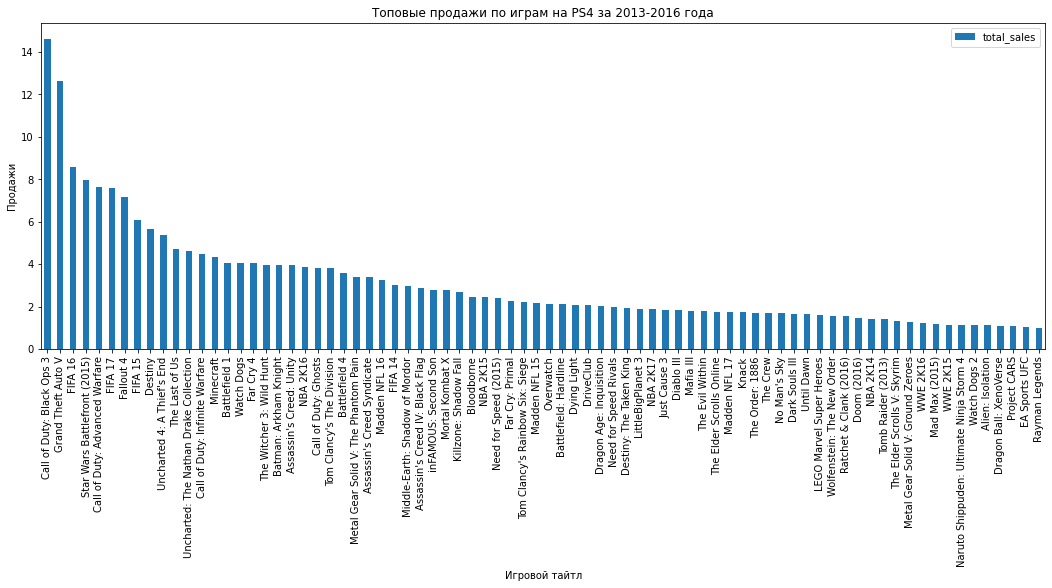

In [113]:
# построим столбчатую диаграмму для созданной сводной таблицы для PS4 с указанием названия тайтлов 
(_.plot(
    kind='bar', 
    x='name',
    y='total_sales',
    title='Топовые продажи по играм на PS4 за 2013-2016 года',
    legend=True, 
    figsize=(18, 6)
)
 .set(
     xlabel='Игровой тайтл', 
     ylabel='Продажи')
)
plt.show()

Есть очень популярные среди пользователей франшизы, продающиеся огромными тиражами. Каких-либо `unknown`, дубликатов или noname-ов не наблюдаем. Считаем, что статистика по платформе чистая 

In [47]:
# аналогичные действия выполним для 3DS, как яркого представителя азиатского рынка с тем же пороговым значением 1 млн. копий 
__ = (recent_platform_data_all
 .query('platform == "3DS" & total_sales > 1')
 .sort_values(by='total_sales', ascending=False)
 [['name','total_sales']]
)

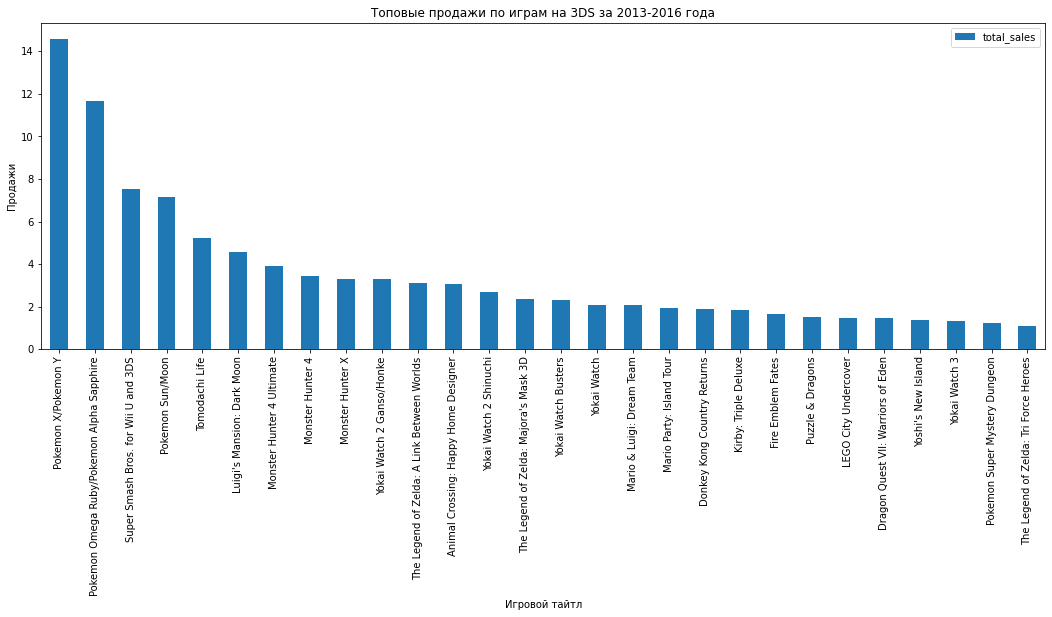

In [48]:
# построим столбчатую диаграмму для созданной сводной таблицы для 3DS с указанием названия тайтлов 
(__.plot(
    kind='bar', 
    x='name',
    y='total_sales',
    title='Топовые продажи по играм на 3DS за 2013-2016 года',
    legend=True, 
    figsize=(18, 6)
)
 .set(
     xlabel='Игровой тайтл', 
     ylabel='Продажи')
)
plt.show()

Снова `unknown`, дубликатов или noname-ов не наблюдаем. Преобладают игры азиатских издателей и разработчиков. Считаем, что статистика по платформе чистая. 

Можно также сделать вывод, что на PS4 выходит популярных игр больше нежели на 3DS, что в большей степени связано с особенностями самих платформ, их техническими возможностями и политикой компаний-издателей.

[К оглавлению](#contents)

<a id='users_meta_score'></a>

### 3. Пользовательский рейтинг и метакритика

Теперь на основании полученных данных по платформам на примере самой популярной и активно развивающейеся на текущий период (2016 год) - PS4 - проанализируем влияние пользовательского рейтинга и отзывов критиков на общие продажи внутри нее. Построим диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

In [49]:
# Функция построения диаграммы рассеяния с отсечением заглушек `-1`

def sales_estimates_actual_data (platform, target_column, title):
    (recent_platform_data_all
    .query('platform == @platform')
    .plot(kind = 'scatter',
          x = target_column,
          y = 'total_sales',
          title = title,
          legend = True,
          grid = True, 
          figsize = (10, 4),
          xlim=0
         )
)

In [50]:
# Функция для вывода корреляции

def corr(data, platform):
    for score in ['user_score', 'critic_score']:
        print(f'Корреляция (sales / {score}) {str(platform)}:', 
              (data
               .query('platform == @platform')['total_sales']
               .corr(data.query('platform == @platform')[score])
              )
             )
    print('-'*60)

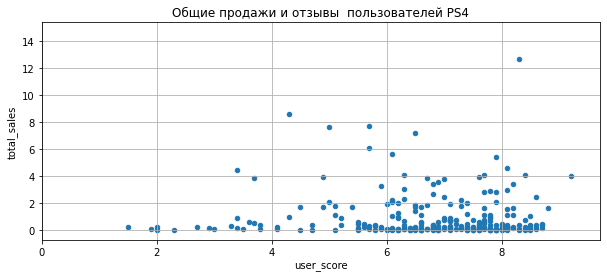

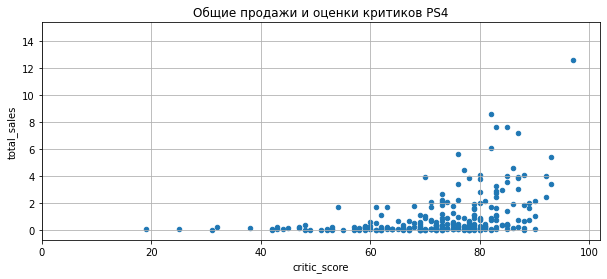

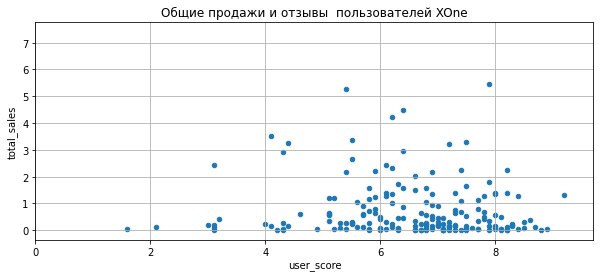

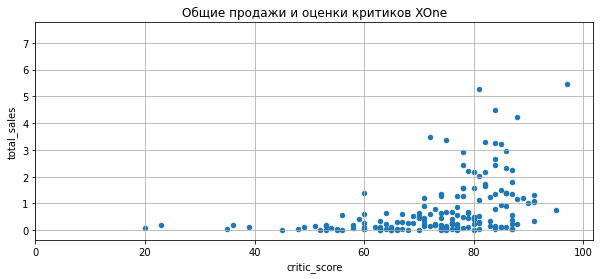

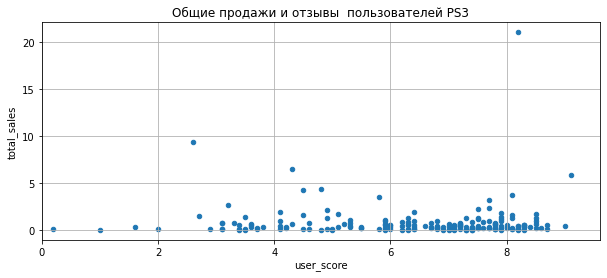

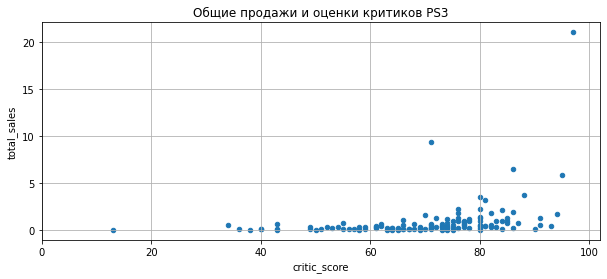

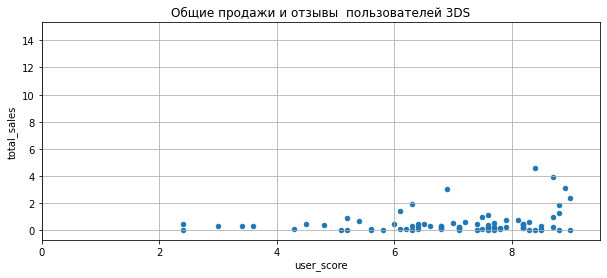

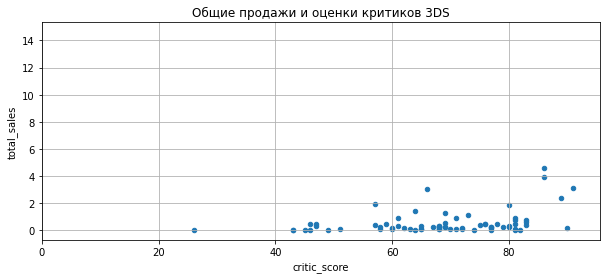

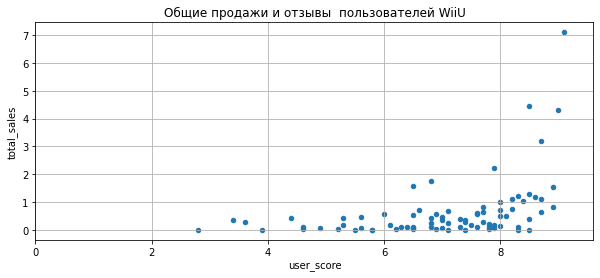

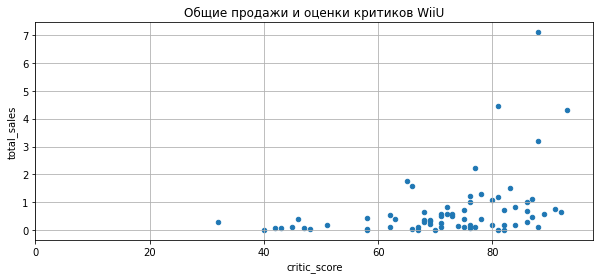

In [51]:
for platform in ['PS4','XOne','PS3','3DS','WiiU']:
    sales_estimates_actual_data(platform, 'user_score', f'Общие продажи и отзывы  пользователей {platform}')
    sales_estimates_actual_data(platform, 'critic_score', f'Общие продажи и оценки критиков {platform}') 

По метакритике чаще всего популярные и хорошо продаваемые игры оценены достаточно высоко. На PS4 больше игр с >80 баллами, но стоит учитывать, что и игр там выпущено больше. А вот отзывы пользователей очень неставильная величина и для европейско-американского рынка лучше всего продаваемые игры часто получают заниженную оценку.

In [52]:
for platform in ['PS4','XOne','3DS','WiiU']: 
    corr(recent_platform_data_all,platform)

Корреляция (sales / user_score) PS4: 0.1159614931286009
Корреляция (sales / critic_score) PS4: 0.22652606614612347
------------------------------------------------------------
Корреляция (sales / user_score) XOne: 0.12171152458232885
Корреляция (sales / critic_score) XOne: 0.27378217261702115
------------------------------------------------------------
Корреляция (sales / user_score) 3DS: 0.04545042308157839
Корреляция (sales / critic_score) 3DS: 0.060809027021315375
------------------------------------------------------------
Корреляция (sales / user_score) WiiU: 0.24040448001166204
Корреляция (sales / critic_score) WiiU: 0.29318140014748445
------------------------------------------------------------


По результатам можно сделать слеюущие промежуточные выводы:
- для `PS4`, `XOne` и `WiiU` есть прямая корреляция с отзывами критиков и покупателей;
- для `3DS` корреляция с отзывами критиков и покупателей незначительная и близится к нулю, что является неодстаточным для установления какой-либо связи, будем считать, она отсутствует;
- **корреляция с отзывами критиков всегда выше**, что связано с более точечными и профессиональными оценками критиков, а также с влиянием оценок на продажи (при выборе о покупке того или иного товара люди чаще обращают внимание на оценки издательств и критиков, нежели на субъективное мнение обладателей продукции - относится только к компьютерным играм в рамках представленных исходных данных).

[К оглавлению](#contents)

<a id='genres'></a>

### 4. Игровые жанры

Произведем сравнительный анализ предпочтений пользователей по жанрам. Для этого найдем количество представленных игр по жанрам, их медианные и суммарные значения по общим продажам.

In [53]:
genre_pivot_table = (recent_platform_data_all
                     .groupby('genre')
                     .agg({
                         'name':'count',
                         'total_sales':['median','sum']
                     })
                     .sort_values(('total_sales', 'median'), ascending=False)
                     .reset_index()
                    )
genre_pivot_table.columns = ['genre', 'games_quantity', 'sales_median', 'sales_sum']

In [54]:
genre_pivot_table

,genre,games_quantity,sales_median,sales_sum
0,Shooter,187,0.450,232.98
1,Sports,214,0.240,150.65
2,Platform,74,0.225,42.63
3,Role-Playing,292,0.125,145.89
4,Fighting,80,0.125,35.31
5,Racing,85,0.120,39.89
6,Action,766,0.110,321.87
7,Simulation,62,0.100,21.76
8,Misc,155,0.100,62.82
9,Strategy,56,0.080,10.08


**Можно сделать следующие выводы:**

- Наиболее востребованными, а соответственно и потенциально приносящими больший доход являются: Shooter, Sports, Platform (дальше мы видим ощутимый скачок медианы на 0.1 пункт);
- больше всего рынок компьютерных игр наполнен Action и по общим продажам среди жанров занимает первое место, однако достаточно низкие продажи отдельно взятых игр (по медиане), говорит о большой "размазанности" пользователей, а следовательно и невысокие доходы с каждой игры;
- наименее востребованными являются жанры: Adventure, Puzzle и Strategy;
- количество выпущенных игр в одном жанре не гарантирует положительные продажи для издателей комьютерных игр;
- наиболее популярные и успешные игры характеризуются высокими показателями медианных и суммарных продаж.

[К оглавлению](#contents)

<a id='users_types'></a>

### 5. Региональные портреты пользователей

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5) с описанием различий в долях продаж.
- Самые популярные жанры (топ-5).
- Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Для каждого региона построим круговые диаграммы, где будут отображаться суммарные продажи, сгруппированные по запрашиваемому параметру.

Напишем функцию для построения аналитических круговых диаграмм и сводных таблиц по входным данным:
- исследуемый датасет;
- исследуемый параметр;
- степень отделения каждой части (по умолчанию это значение равно 0.05);
- необходимый ТОП-N.

И которая будет выводить:
- сводную таблицу, сформированную по целевому параметру для каждого региона;
- круговую диаграмму с самыми большими показателями целевого параметра по каждому региону с заданным топом.

In [55]:
def profile_users (target_data, target_parameter, top=5, explode_value=0.05):
    # создание сводной таблицы
    target_parameter_sale = (target_data
             .groupby(target_parameter)
             .agg({
                 'name':'count',
                 'na_sales':'sum',
                 'eu_sales':'sum',
                 'jp_sales':'sum',
                 'total_sales':['median','sum']
             })
             .sort_values(('total_sales', 'median'), ascending=False)
             .reset_index()
            )
    target_parameter_sale.columns = [target_parameter, 'games_quantity', 'na_sales', 'eu_sales', 'jp_sales', 'total_sales_median', 'total_sales_sum']
    
    print('\n\t\033[4m\033[1m\033[31m{}\033[0m'.format(target_parameter))
    display(target_parameter_sale)

    # описание параметров для построения тройной круговой диаграммы
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 8))
    fig.autofmt_xdate();

    k = 0
    x = [ax1, ax2, ax3]
    region = ['na_sales', 'eu_sales', 'jp_sales']

    # составление списка параметров для каждой части
    explode = []
    for i in range(top):
        explode.append(explode_value)

    # построение круговой диаграммы через цикл
    for k in [0,1,2]:
        target_parameter_sale_top = target_parameter_sale.sort_values([region[k]], ascending=False).head(top)
        sizes = target_parameter_sale_top[region[k]].values
        ax = x[k]
        ax.set_title(f'Продажи по {target_parameter} в регионе {region[k]}', fontsize = 17)
        ax.pie(sizes,
               labels = target_parameter_sale_top[target_parameter],
               autopct = '%1.1f%%',
               shadow = True,
               explode = explode,
               textprops={'fontsize': 15},
               startangle = 90)
        ax.axis('equal')
    plt.show()
    print('*' * 120)

**Для анализа**
1. возьмем за основу сформированную таблицу с актуальной информацией (актуальной считается за 3 года, т.е. с **2013-2016**) в переменной **`recent_platform_data_all`**
2. в качестве целевых параметров:
- платформы **`platform`**;
- жанры игр в **`genre`**;
- рейтинг ESRB в **`rating`**.
3. **ТОП-5** самых популярных параметров в каждом регионе

In [56]:
target_data = recent_platform_data_all # выбор таблицы для исследования
target_parameters = ['platform', 'genre', 'rating'] # выбор интересующих параметров
top = 5 # можно установить необходимый ТОП


	platform


,platform,games_quantity,na_sales,eu_sales,jp_sales,total_sales_median,total_sales_sum
0,X360,186,81.66,42.52,0.51,0.265,136.80
1,XOne,247,93.12,51.59,0.34,0.220,159.32
2,PS4,392,108.74,141.09,15.96,0.200,314.14
3,WiiU,115,29.21,19.85,10.88,0.200,64.63
4,Wii,23,6.56,5.93,0.05,0.180,13.66
5,DS,8,0.57,0.85,0.00,0.150,1.54
6,PS3,345,63.50,67.81,23.35,0.150,181.43
7,3DS,303,38.20,30.96,67.81,0.090,143.25
8,PC,189,11.11,25.36,0.00,0.080,39.43
9,PSV,358,5.04,6.10,18.59,0.040,32.99


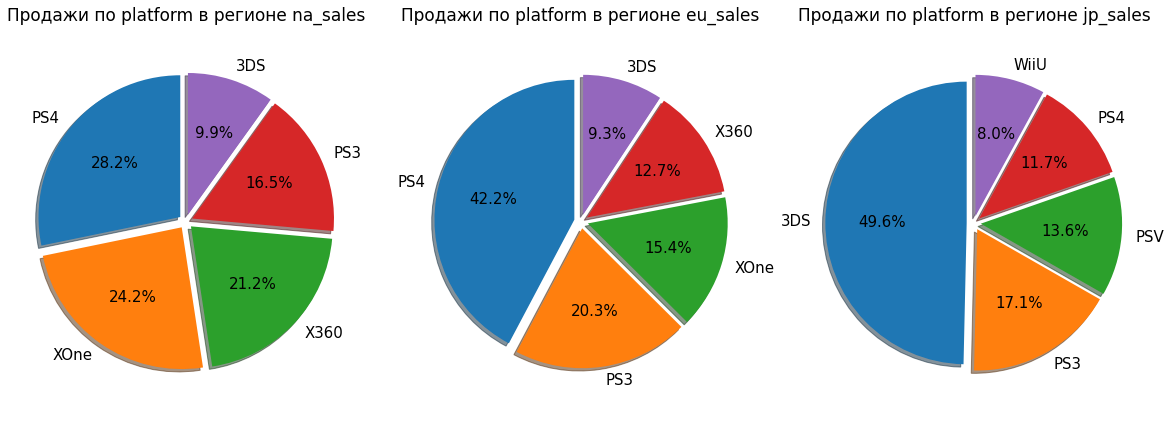

************************************************************************************************************************

	genre


,genre,games_quantity,na_sales,eu_sales,jp_sales,total_sales_median,total_sales_sum
0,Shooter,187,109.74,87.86,6.61,0.450,232.98
1,Sports,214,65.27,60.52,5.41,0.240,150.65
2,Platform,74,18.14,15.58,4.79,0.225,42.63
3,Role-Playing,292,46.40,36.97,51.04,0.125,145.89
4,Fighting,80,15.55,8.55,7.65,0.125,35.31
5,Racing,85,12.96,20.19,2.30,0.120,39.89
6,Action,766,126.05,118.13,40.49,0.110,321.87
7,Simulation,62,4.86,10.92,4.52,0.100,21.76
8,Misc,155,27.49,20.04,9.20,0.100,62.82
9,Strategy,56,3.28,4.22,1.77,0.080,10.08


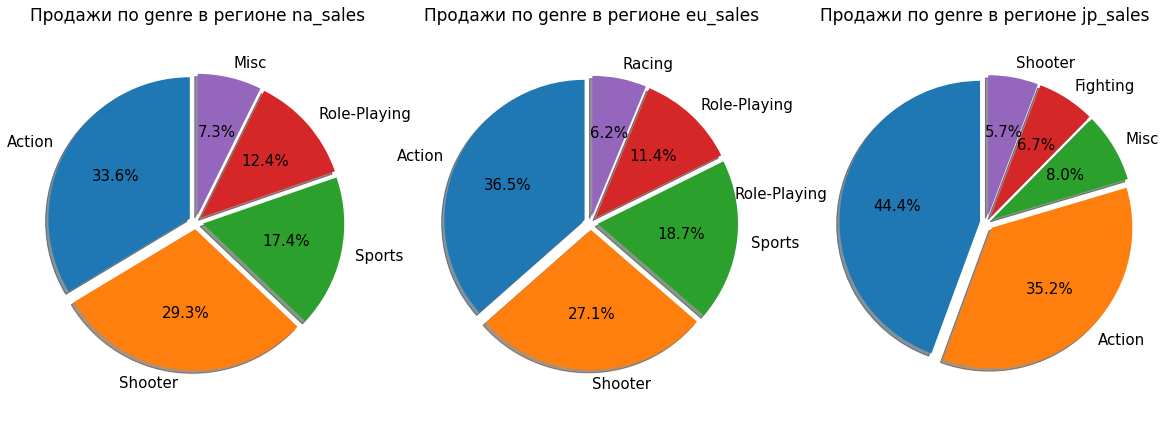

************************************************************************************************************************

	rating


,rating,games_quantity,na_sales,eu_sales,jp_sales,total_sales_median,total_sales_sum
0,17,369,165.21,145.32,14.11,0.340,371.68
1,10,252,54.24,42.69,5.89,0.275,115.39
2,6,302,79.05,83.36,15.14,0.175,200.16
3,13,333,49.79,41.95,20.59,0.150,126.62
4,-1,977,89.42,78.91,85.05,0.050,276.84


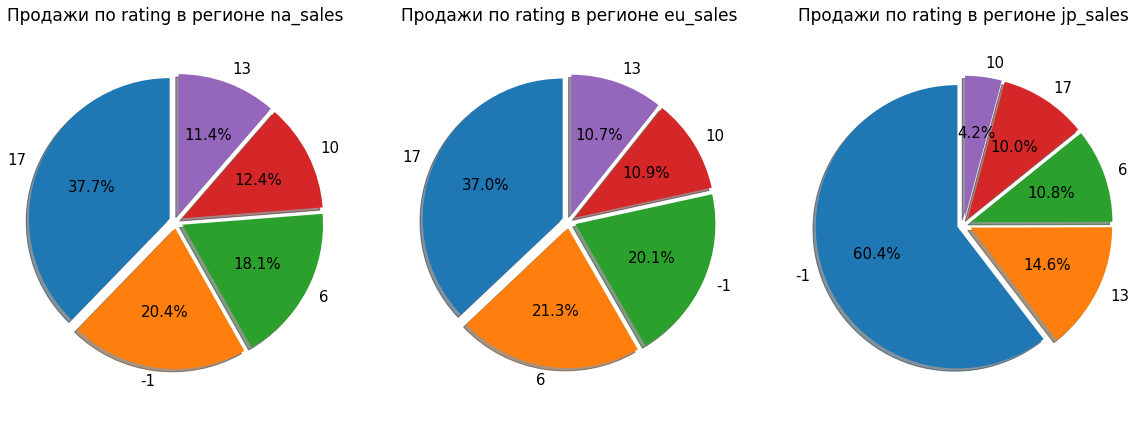

************************************************************************************************************************


In [57]:
for target_parameter in target_parameters:
    profile_users(target_data, target_parameter, top)

**Результаты по регионам:**

1. В NA регионе входят в **ТОП-5** самых популярных:
- платформ - PS4, XOne, X360, PS3;
- жанров - Action, Shooter, Sports, Role-Playing;
- игр - с возрастным рейтингом 17+ и 6+ (`-1` игры с неизвестным рейтингом, их опускаем).

2. EU регионе входят в **ТОП-5** самых популярных:
- платформ - PS4,PS3, XOne, X360;
- жанров - Action, Shooter, Sports, Role-Playing;
- игр - с возрастным рейтингом 17+ и 6+ (`-1` игры с неизвестным рейтингом составляют значительную часть рынка компьютерных игр, их придется опустить за неимением информации).

3. JP регионе входят в **ТОП-5** самых популярных:
- платформ - 3DS (подавляющее большинство в виду того, что платформа производится преимущественно для внутреннего азиатского рынка и удовлетворяет всем их потребностям), PS3, PSV, PS4;
- жанров - Role-Playing, Action (у остальных игр объемы продаж отличаются внушительно);
- игр - с возрастным рейтингом 13+ и 6+ (`-1` игры с неизвестным рейтингом составляют большую часть рынка компьютерных игр, их придется опустить за неимением информации). В Японии выпускается огромное количество игр, не проходящих комиссию по присвоению возрастного рейтинга.

[К оглавлению](#contents)

<a id='data_research_summary'></a>

### **Выводы**

Как показали результаты анализа данных:
**1. по динамике развития платформ:**
- начиная с `1995` года наблюдается рост продаж компьютерных игр в связи с развитием компьютерных технологий, сервисов, а самое главное - увеличилась покупательская способность населения и спрос на игры;
- начиная с `2008` года наблюдается деградация уровня продаж. Возможно, это связано с внешнеполитическими и экономическими факторами страны, а также широким распространением сети Интернет и пиратского контента на сторонних сервисах;
- наиболее актуальной статистикой на `2016` год принят разброс в 3 года. В перспективе необходимо уменьшать промежуток актульаной статистики в связи с быстро развивающимися технологиями и потребностями пользователей;
- все платформы проходят через этап морального и физического старения, сказывающего на бизнесе (платформы `PSP` и `DS` являются уже устаревшими; `3DS`, `PS3`, `PSV`, `Wii`, `WiiU` и `X360` плавно и равномерно теряли популярность как среди покупателей, так и среди разработчиков игр, издателей); 
- для платформ `XOne` и `PS4` в `2016` году произошел дисбаланс спроса и предложения, что характеризует неудовлетворительную маркетинговую компанию: ассортимент игр рос с каждым годом, а вот спрос на них после 2015 года резко сократился. Возможно, проблема кроется в неправильной рекламной политике, преобладающей конкуренции со стороны другого платформодержателя или каких-либо конфликтов и скандалов вокруг платформодержателей, потому что потребительский спрос очень чувствителен к таким событиям. Однако падение интереса аудитории носит общий характер для обоих передовых платформ этого времени, значит необходимо узнать подробнее обстоятельства того времени и также узнать, возможно, отток клиентов связан с самим сервисом интернет-магазина компьютерных игр «Стримчик»;
- для платформы `PC` также характерен отток покупателей при равномерном увеличении ассортимента товаров. Если не брать в расчет экономические и политические обстоятельства, то причина может заключаться в открытости самой платформы, позволяющей обходить лицензии официальных приложений;  
- платформа `PS4` имеет лучшие показатели по количеству проданных копий (значит и прибыли) и развитости ассортимента компьютерных игр, представляющего интерес для покупателей;
- в среднем платформа активно развивается и поддерживается ~4-5 лет, а живет около 8-10 лет;

**2. по зависимости от факторов:**
- для `PS4`, `XOne` и `WiiU` есть прямая корреляция с отзывами критиков и покупателей;
- для `3DS` прямая корреляция с отзывами критиков и покупателей есть, но незначительная.
- **корреляция с отзывами критиков всегда выше**, что связано с более точечными и профессиональными оценками критиков, а также с влиянием оценок на выбор покупателей и дальнейшие продажи игр;

**3. По жанровым направлениям в играх:**
- наиболее востребованными, а соответственно и потенциально приносящими больший доход являются: Shooter, Sports, Platform;
- больше всего рынок компьютерных игр наполнен Action и по общим продажам среди жанров занимает первое место, однако достаточно низкие продажи отдельно взятых игр (по медиане), говорит о большой "размазанности" пользователей, а следовательно и невысокие доходы с каждой игры;
- наименее востребованными являются жанры: Adventure, Puzzle и Strategy;
- количество выпущенных игр в одном жанре не гарантирует положительные продажи для издателей комьютерных игр;
- наиболее популярные и успешные игры характеризуются высокими показателями медианных и суммарных продаж.

**4. По Портретам пользователей:**
- для Северной Америки и Европы характерны близкие профили пользователей, которые чаще всего выбирают одни и те же платформы `PS4`, `XOne`, `X360`, `PS3` и предпочитают игры одинакового или похожего жанров `Action`, `Shooter`, `Sports`, `Role-Playing`; также наиболее популярные игры имеют одинаковый возрастной рейтинг `17+` и `6+` для двух регионов, но в Европе количество игр без рейтинга или в процессе его получения больше;
- кардинально другая ситуация обстоит с Японией и азиатским рынком, где преобладает местная платформа `3DS`, жанры `Role-Playing` и `Action`, а также игры, не получившие возрастного рейтинга, что обусловленно выпуском массы игр, не проходящих комиссию по присвоению возрастного рейтинга и ориентированных только на местную аудиторию.

[К оглавлению](#contents)

<a id='hypothesis_check'></a>

## **IV. Проверка гипотез**

Последним этапом нашего исследования является проверка гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [58]:
def hypothesis_equal_check (target1, target2, target_type, parameter, alpha=.05):

    value1 = recent_platform_data_all[recent_platform_data_all[target_type] == target1] 
    value2 = recent_platform_data_all[recent_platform_data_all[target_type] == target2]

    results = st.ttest_ind(value1[parameter], value2[parameter], nan_policy='omit')
    print('Значение p-value: ', results.pvalue)

    if (results.pvalue < alpha):
        print('Отвергаем Нулевую гипотезу')
    else:
        print('Не получилось отвергнуть Нулевую гипотезу')

<a id='hypothesis_1'></a>

### 1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые

* За **нулевую гипотезу H(0)** примем утверждение, что **средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.
* В качестве **альтернативной гипотезы H(1)** представим **двустороннюю** - средние пользовательские рейтинги **различаются**.
* Критический уровень значимости зададим 5%.

In [59]:
hypothesis_equal_check('PC', 'XOne', 'platform', 'user_score')

Значение p-value:  0.20111399900783614
Не получилось отвергнуть Нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинакова, с вероятностью в почти 14% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами платформ. Иными словами, если мы отклоним нулевую гипотезу, мы ошибемся с вероятность в 14%

<a id='hypothesis_2'></a>

### 2. Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные

* За **нулевую гипотезу H(0)** примем утверждение, что **средние пользовательские рейтинги жанров Action и Sports одинаковые**.
* В качестве **альтернативной гипотезы H(1)** представим **двустороннюю** - средние пользовательские рейтинги **различаются**.
* Критический уровень значимости зададим 5%.

In [60]:
hypothesis_equal_check('Action', 'Sports', 'genre', 'user_score')

Значение p-value:  0.02193663336455412
Отвергаем Нулевую гипотезу


Значение p-value говорит нам о малой вероятности случайности результатов, что дает основание отвергнуть предположение об отсутствии различий между средними пользовательскими рейтингами Action и Sports (отвергнуть нулевую гипотезу).

[К оглавлению](#contents)

<a id='summary'></a>

## **V. Итоги исследования**

На основании предоставленной базы данных интернет-магазином компьютерных игр «Стримчик» было проведено сравнительное исследование рынка компьютерных игр и платформ для определения наиболее прибыльного для бизнеса, которое следует продвигать среди пользователей за счет маркетинговых кампаний.

По результатам проведенного анализа получены следующие сведения:

**1. по динамике развития платформ:**
- начиная с `1994` года наблюдается **рост** выпускаемых игр **со 100 до почти 950 шт. в год к 2008 году** в связи с развитием платформ и массовой культуры виртуальных игр.
- начиная с `2008` года наблюдается **деградация** уровня ежегодных релизов **до 200 к 2016 году**. Это может быть связано с изменением ориентиров игровых издательств: развитие и усложнение цифровых технологий и растущий уровень ожиданий пользователей вынуждает разработчиков виртуальных игр затрачивать больше ресурсов (в том числе временных) на выпуск более качественных продуктов с целью получения хороших продаж. 
- начиная с `1995` года наблюдается **рост** продаж компьютерных игр **со 100 млн. копий до почти 680 млн. в 2008 году** в связи с развитием компьютерных технологий, сервисов, а самое главное - увеличилась покупательская способность населения и спрос на игры;
- начиная с `2008` года наблюдается **деградация** уровня продаж до **150 млн. копий в 2016 году**. Возможно, это связано с внешнеполитическими и экономическими факторами страны, а также широким распространением сети Интернет и пиратского контента на сторонних сервисах;
- наиболее **актуальной статистикой** на `2016` год принят разброс в **3 года**. В перспективе необходимо уменьшать промежуток актуальной статистики в связи с быстро развивающимися технологиями и потребностями пользователей;
- все платформы проходят через этап морального и физического старения, сказывающего на бизнесе (платформы `PSP` и `DS` являются уже устаревшими; `3DS`, `PS3`, `PSV`, `Wii`, `WiiU` и `X360` плавно и равномерно теряли популярность как среди покупателей, так и среди разработчиков игр, издателей); 
- для платформ `XOne` и `PS4` в `2016` году произошел **дисбаланс спроса и предложения**, что характеризует неудовлетворительную маркетинговую компанию: ассортимент игр рос с каждым годом, а вот **спрос** на них **после 2015 года резко сократился**. Возможно, проблема кроется в неправильной рекламной политике, преобладающей конкуренции со стороны другого платформодержателя или каких-либо конфликтов и скандалов вокруг платформодержателей, потому что потребительский спрос очень чувствителен к таким событиям. Однако падение интереса аудитории носит общий характер для обоих передовых платформ этого времени, значит необходимо узнать подробнее обстоятельства и также, возможно, отток клиентов связан с самим сервисом интернет-магазина компьютерных игр «Стримчик»;
- для платформы `PC` также характерен **отток покупателей** при равномерном **увеличении ассортимента товаров**. Если не брать в расчет экономические и политические обстоятельства, то причина может заключаться в открытости самой платформы, позволяющей обходить лицензии официальных приложений;  
- платформа `PS4` имеет **лучшие показатели** по количеству проданных копий (значит и прибыли) и развитости ассортимента компьютерных игр, представляющего интерес для покупателей;
- в среднем **платформа активно развивается и поддерживается ~4-5 лет, а живет около 8-10 лет**;

**2. по зависимости от факторов:**
- для `PS4`, `XOne` и `WiiU` есть прямая корреляция с отзывами критиков и покупателей;
- для `3DS` корреляция с отзывами критиков и покупателей отсутствует;
- **корреляция с отзывами критиков всегда выше**, что связано с более точечными и профессиональными оценками критиков, а также с влиянием оценок на выбор покупателей и дальнейшие продажи игр;

**3. По жанровым направлениям в играх:**
- наиболее востребованными, а соответственно и потенциально приносящими больший доход являются: Shooter (эти игры **продаются в два раза лучше других жанрав**), Sports, Platform;
- больше всего рынок компьютерных игр наполнен `Action` (**766 игр**) и по общим продажам среди жанров в **322 млн. копий** занимает **первое место**, однако достаточно низкие продажи отдельно взятых игр (по медиане), говорит о большой "размазанности" пользователей, а следовательно и невысокие доходы с каждой игры;
- наименее востребованными являются жанры: `Adventure`, `Puzzle` и `Strategy` с низкими продажами не превышающими **вместе 35 млн копий**;
- количество выпущенных игр в одном жанре не гарантирует положительные продажи для издателей комьютерных игр;
- наиболее популярные и успешные игры характеризуются высокими показателями медианных и суммарных продаж.

**4. По Портретам пользователей:**
- для Северной Америки и Европы характерны близкие профили пользователей, которые чаще всего выбирают одни и те же платформы `PS4` ~ 30-40%, `XOne` ~15-20%, `X360` ~12-20%, `PS3` - ~16-20%  и предпочитают игры одинакового или похожего жанров `Action` ~35%, `Shooter` ~27%, `Sports` ~18%, `Role-Playing` ~12, `Racing` ~ 7%; также наиболее популярные игры имеют одинаковый возрастной рейтинг `17+` и `6+` для двух регионов, но в Европе количество игр без рейтинга или в процессе его получения больше;
- кардинально другая ситуация обстоит с Японией и азиатским рынком, где преобладает местная платформа `3DS` ~50%, `PS4` ~ 12%, `PS3` - ~17%, жанры `Role-Playing` ~44% и `Action` ~35%, а также игры, не получившие возрастного рейтинга, что обусловленно выпуском массы игр, не проходящих комиссию по присвоению возрастного рейтинга и ориентированных только на местную аудиторию.

---

На основании данных, предоставленных магазином, мы также проверили две гипотезы и установили:

---

**1. Гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые**.

Согласно статистике, сделали вывод:

хотя средние пользовательские рейтинги платформ Xbox One и PC и неодинакова, с вероятностью в почти 14% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами платформ. Иными словами, если **мы отклоним нулевую гипотезу, мы ошибемся с вероятность в 14%**

---

***2. Гипотеза: средние пользовательские рейтинги жанров Action и Sports разные***

По полученным данным сделали вывод:

Значение p-value говорит нам о малой вероятности случайности результатов, что дает основание отвергнуть предположение об отсутствии различий между средними пользовательскими рейтингами Action и Sports (***отвергнуть нулевую гипотезу***).

---

**Помимо этого в ходе исследования была выполнена [обработка исходных данных](#data_moderation_summary) для удобства анализа.**

---

**Дополнительные рекомендации:**
* при планировании маркетинговой кампании и продвижении той или иной продукции необходимо четко понимать, на какой рынок направлено развитие: на американо-европейский или на азиатский, так как они кардинально отличаются между собой: для Азии следует сфокусироваться на местной платформе `3DS` и жанрах `Role-Playing`, `Action`, а для Америки и Европы - на PS и XBox последних поколений с поддержкой предпоследних, наиболее распространенными играми являются `Action` и `Role-Playing` (схожие вкусы с азиатским рынком) с`Shooter` и `Sports`, пользующихся огромным спросом;
* не стоит поддаваться искушению продвигать игры в том жанре, где выпущено их очень много или наоборот очень мало, необходимо учитывать среднестатистическую прибыль от всего жанра, а не брать конктретных представителей.

[К оглавлению](#contents)